In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

###requests는 파이썬에서 http 요청을 보낼 때 쓸 라이브러리, BeautifulSoup는 html에서 정보를 간단하게 빼오기 위해 사용할 라이브러리

In [2]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=5&p=1"
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')
html


<!--  앱 평가 리스트 시작 -->
<div class="subra" style="border-top:1px solid #ccc;">
<ul>
<li>
<div class="photo">
<img alt="Sang-Min *** 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">Sang-Min ***</span> <span class="level_ico score0">5</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					타사에 비해 좋음. 종목추천, 회사 정보등. 종목토론방도 네이버, 다음까지 다 볼수 있습니다. UI의 디자인이 깨끗하고 쉽게 볼수 있게 구성되어 있습니다. 타사앱은 잦은 오류가 있어서 나무앱으로 갈아탈려고 생각중입니다.
				</p>
</div>
</li>
<li>
<div class="photo">
<img alt="윤 ** 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">윤 **</span> <span class="level_ico score0">5</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					이번에 새로생긴 "차트패턴비교"에 주가이동평균선 수정을 해놓으면 설정변경이 1회성으로만 반영이 되고 말아버립니다. 차트패턴비교 볼 때마다 재설정해야해요. 

In [3]:
score_result = html.find('div', {'class': 'subra'})
lis = score_result.findAll('li')
lis[0]

<li>
<div class="photo">
<img alt="Sang-Min *** 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">Sang-Min ***</span> <span class="level_ico score0">5</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					타사에 비해 좋음. 종목추천, 회사 정보등. 종목토론방도 네이버, 다음까지 다 볼수 있습니다. UI의 디자인이 깨끗하고 쉽게 볼수 있게 구성되어 있습니다. 타사앱은 잦은 오류가 있어서 나무앱으로 갈아탈려고 생각중입니다.
				</p>
</div>
</li>

In [4]:
review_text = lis[0].findAll('p')[1].getText()
review_text


'\r\n\t\t\t\t\t타사에 비해 좋음. 종목추천, 회사 정보등. 종목토론방도 네이버, 다음까지 다 볼수 있습니다. UI의 디자인이 깨끗하고 쉽게 볼수 있게 구성되어 있습니다. 타사앱은 잦은 오류가 있어서 나무앱으로 갈아탈려고 생각중입니다.\r\n\t\t\t\t'

In [5]:
review_score=lis[0].find_all('span')[1].getText()
review_score

'5'

In [6]:
customer=lis[0].find_all('span')[0].getText()
customer

'Sang-Min ***'

In [7]:
test_url1 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=5&p=1"
def get_data(url):#1페이지를 크롤링하는 메소드
    temp_list=[]
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    score_result = html.find('div', {'class': 'subra'})
    lis = score_result.findAll('li')
    for li in lis:
        review_text = li.find_all('p')[1].getText()
        review_score=li.find_all('span')[1].getText()
        customer=li.find_all('span')[0].getText()
        temp_list.append([customer,review_text,review_score])
    raw_df=pd.DataFrame(data=temp_list,columns=['Customer','Review','Score'])
    return raw_df

In [24]:
test_url2 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=5&p=2"
test_url3 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=5&p=3"
test_url4 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=5&p=4"
test_url5 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=5&p=5"
test_url6 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=5&p=6"


In [25]:
a=get_data(test_url1)
b=get_data(test_url2)
c=get_data(test_url3)
d=get_data(test_url4)
e=get_data(test_url5)
f=get_data(test_url6)

In [10]:
print(type(a))

<class 'pandas.core.frame.DataFrame'>


In [11]:
print(type(b))

<class 'pandas.core.frame.DataFrame'>


In [12]:
a

,Customer,Review,Score
0,Sang-Min ***,"\r\n\t\t\t\t\t타사에 비해 좋음. 종목추천, 회사 정보등. 종목토론방도 ...",5
1,윤 **,"\r\n\t\t\t\t\t이번에 새로생긴 ""차트패턴비교""에 주가이동평균선 수정을 해...",5
2,티티**,\r\n\t\t\t\t\t여기저기 증권어플 많이써봤는데 수수료때문에 나무로 넘어왔는...,5
3,상승**,\r\n\t\t\t\t\t어플을 평소에 잘 사용하고 있습니다. 좋은 어플 만들어 주...,5
4,Dexte***,\r\n\t\t\t\t\t안녕하세요 사용자 친화적으로 만든 앱 잘 쓰고 있습니다. ...,5
5,*** ***,\r\n\t\t\t\t\t위젯 글자크기 조절 가능하게 좀 해주세요. 글자가 부담스러...,5
6,김정*,\r\n\t\t\t\t\tㅠㅜ원래 로그인하면 내잔고하고 수익금 예수금 나오는데 계속...,5
7,윤형*,"\r\n\t\t\t\t\t초보자가 정보를 쉽게 찾고, 한눈에 볼수있게 쉽게 구현된것...",5
8,김주*,\r\n\t\t\t\t\t매매동향에서 단위를 적으면 좋을것 같습니다. 외국인 매매동...,5
9,원재*,\r\n\t\t\t\t\t계좌를 만들때 신분증을 무조건 사진으로 찍어야되는 이유가 ...,5


In [13]:
b

,Customer,Review,Score
0,Junyeong ***,\r\n\t\t\t\t\t어플을 평소에 잘 사용하고 있습니다. 좋은 어플 만들어 주...,5
1,현승*,\r\n\t\t\t\t\t다 좋은데 업데이트 되고부터 위젯이 짤립니다 밑에 등락률이...,5
2,Sang Ho P***,\r\n\t\t\t\t\t개선되는점도 좋습니다. 매도시 1주당 얼마에 매도 되었는지...,5
3,김원*,"\r\n\t\t\t\t\t삼성, 하이, 미래, 유안타, 한국, 신한 등 써봤는데 그...",5
4,K Rob***,"\r\n\t\t\t\t\t뒤로가기버튼을 누르면 처음으로 돌아가지 말고, 이전 창으로...",5
5,박승*,"\r\n\t\t\t\t\t잘 쓰고 있는데, 갑자기 간편인증번호 인증에 실패했다고 뜹...",5
6,universe cos***,\r\n\t\t\t\t\t다양기능 편리 좋아요!~~ 주식 선물 옵션 해외주식 거래까...,5
7,이준*,\r\n\t\t\t\t\t접속과 메뉴 이용하기에 편하고 무엇보다 수수료가 저렴하다....,5
8,DB chan ***,\r\n\t\t\t\t\t이번업데이트 하고 상승률상위종목 탭이 없어졌는데 이번업뎃 ...,5
9,서즐겁게***,\r\n\t\t\t\t\t안녕하십니까. 고객 편의을 위한 보다 낳은 정보 제공을 위...,5


In [33]:
x=pd.concat([a,b,c,d,e,f],ignore_index=True)
x.head()
print(x.shape)

(60, 3)


In [34]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=5&p="
#여러페이지를 크롤링하는 함수
def Mycrawl(page):
    for i in range(1,page):
        if(i==1):
            addr=test_url+str(i)
            xdata=get_data(addr)
            ydata=get_data(addr+str(i+1))
            zdata=pd.concat([xdata,ydata])
        else:
            ydata=get_data(addr+str(i+1))
            zdata=pd.concat([zdata,ydata],ignore_index=True)
    return zdata
        #get_data(addr)[1]
        #newtemp_list=a.append(get_data(addr))
    #return newtemp_list

In [22]:
Mycrawl(4)

IndexError: list index out of range

In [35]:
import sqlite3
import requests
from bs4 import BeautifulSoup
import sqlite3
from konlpy.tag import *
from konlpy.utils import pprint

import pandas as pd

In [33]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=5&p="
df=Mycrawl(9)

In [34]:
print(df.shape)

(90, 3)


In [35]:
df.head()
df.tail()

,Customer,Review,Score
85,황주*,\r\n\t\t\t\t\t신분증 등록시 촬영버튼을 눌러도 촬영이 안되는 불편이 있음...,1
86,누구나하***,\r\n\t\t\t\t\t3.2 짜리로 표기해놓고 3.4 있어도 안사지더만 실제 수...,1
87,홍성*,\r\n\t\t\t\t\t차트설정 오류 및 검색기능이나 모든것이 불편함\r\n\t\...,1
88,ㄱㄴ*,\r\n\t\t\t\t\t회원가입시 휴대폰번호 입력란이 클릭되지 않아 번호입력이 불...,1
89,박성*,\r\n\t\t\t\t\t폰에서 뒤로가가 버튼 누르면바로 종료화면 창뜨게해주세요 종...,1


In [36]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [36]:
from wordcloud import WordCloud 
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
import matplotlib.font_manager as fm
font_location = 'malgun.ttf'  
#C:\\Users\\Administrator\\Documents\\asiasummer\\webdata\\
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

print(font_name)

Malgun Gothic


<Figure size 864x864 with 0 Axes>

In [40]:
alpha=str(x['Review'])

In [46]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 3000,
    height = 3000,
    stopwords=['t','/','r','n',"있습니다","해주세요","어플","쓰고","사용하고","증권사","주식","만들어"],background_color="white"
)
w=w.generate(alpha)


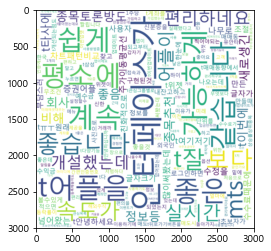

In [47]:
plt.imshow(w,interpolation='bilinear')